# Electric Vehicles Market Size Analysis using Python


#### Process I can follow for this task

1.Define whether the analysis is global, regional, or focused on specific countries.

2.Gather information from industry associations, market research firms (e.g., BloombergNEF, IEA), and government publications relevant to the EV market.

3.Use historical data to identify trends in EV sales, production, and market.

4.Analyze the market size and growth rates for different EV segments.

5.Based on the market size analysis, provide strategic recommendations for businesses looking to enter or expand in the EV market.

In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\ASUS\Downloads\EV-data\Electric_Vehicle_Population_Data.csv")

In [2]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
data.describe(include = 'object')

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,177866,177861,177861,177866,177866,177866,177866,177866,177857,177861
unique,10830,196,723,46,40,139,2,3,861,76
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,1239,92740,29447,177477,79659,35989,139210,91950,4574,65990


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

#### 1. EV Adoption Over Time

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 


In [9]:
ev_over_year = data['Model Year'].value_counts().sort_index()

In [10]:
ev_over_year.index

Int64Index([1997, 1998, 1999, 2000, 2002, 2003, 2008, 2010, 2011, 2012, 2013,
            2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
           dtype='int64')

In [11]:
ev_over_year.values

array([    1,     1,     5,     7,     2,     1,    19,    23,   775,
        1614,  4399,  3496,  4826,  5469,  8534, 14286, 10913, 11740,
       19063, 27708, 57519,  7072], dtype=int64)

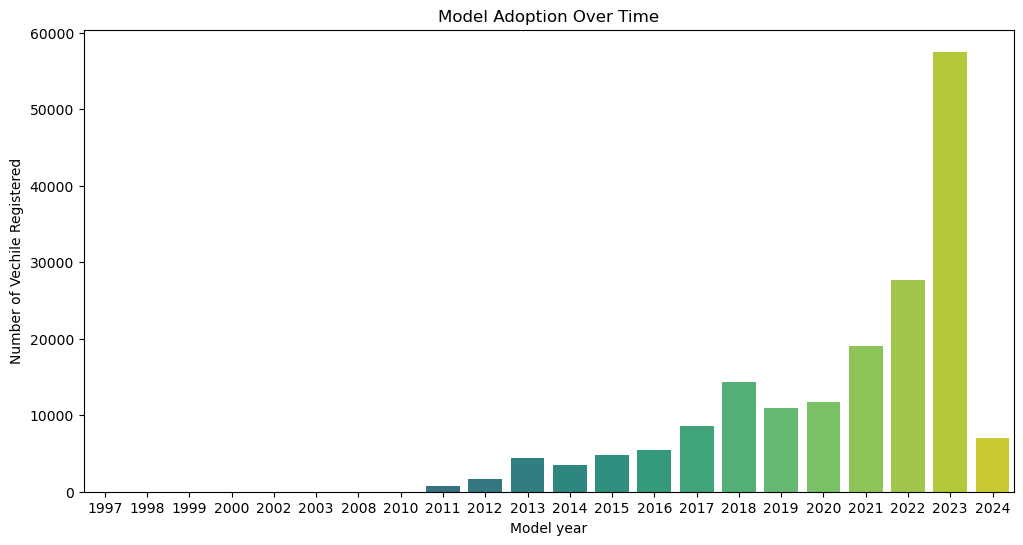

In [32]:
plt.figure(figsize = (12,6))
sns.barplot(x=ev_over_year.index, y=ev_over_year.values, palette = 'viridis')
plt.title("Model Adoption Over Time")
plt.xlabel("Model year")
plt.ylabel("Number of Vechile Registered")
plt.show()

The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

#### 2. Geographical Distribution:

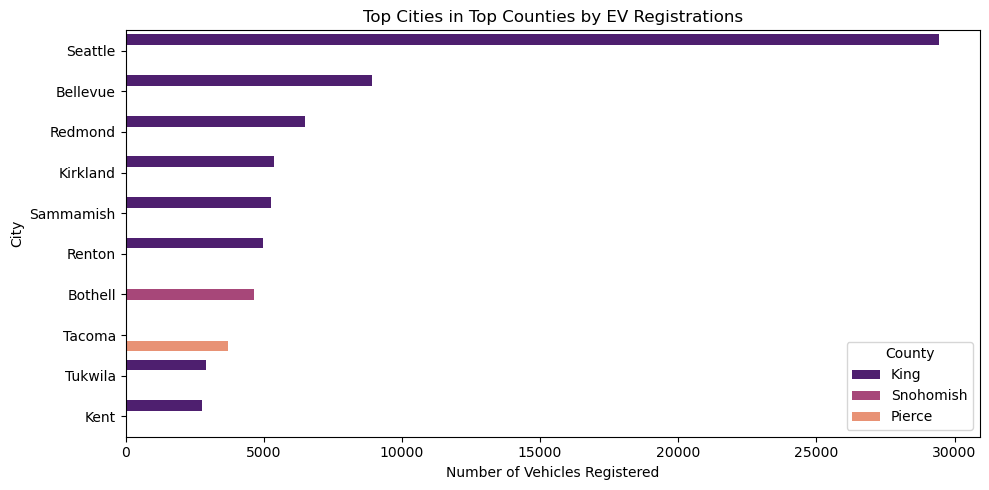

In [13]:
# geographical distribution at county level
ev_county_distribution = data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = data[data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

 let’s explore the types of electric vehicles represented in this dataset

#### 3. EV Types:

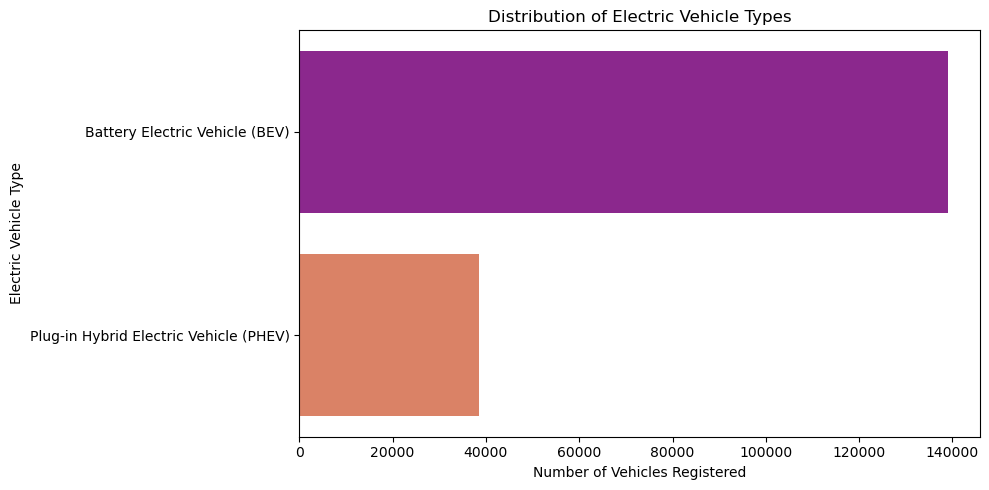

In [14]:
ev_type_dis = data["Electric Vehicle Type"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=ev_type_dis.values, y = ev_type_dis.index, palette="plasma")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.

Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

#### 4. Make and Model Popularity:

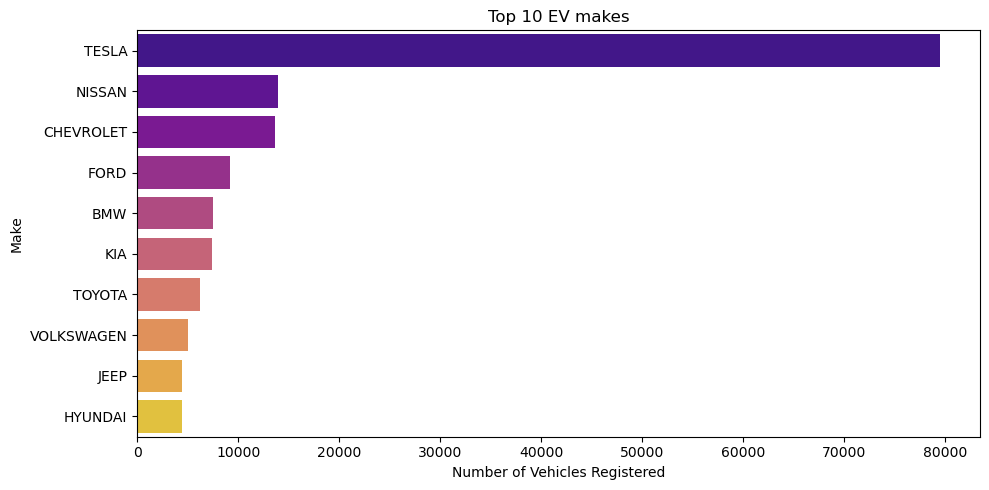

In [15]:
ev_make = data['Make'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=ev_make.values, y = ev_make.index, palette="plasma")
plt.title("Top 10 EV makes")
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()



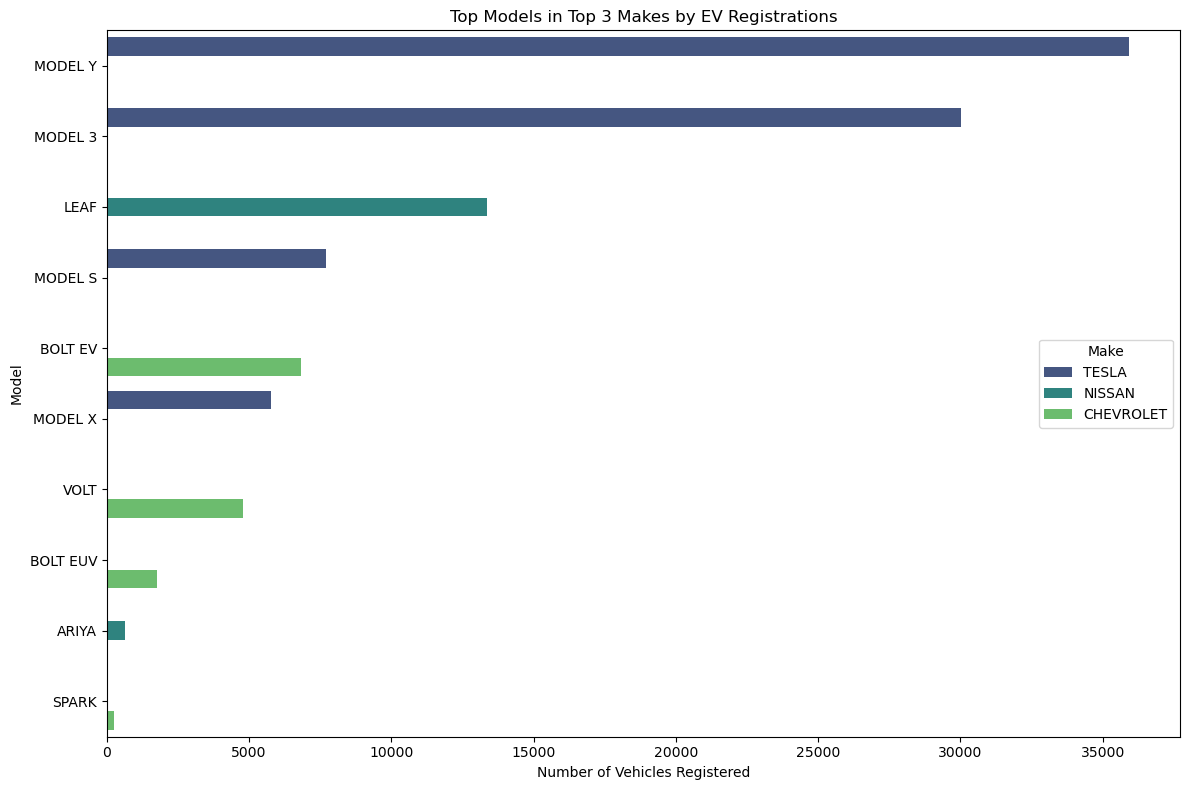

In [16]:
top_3_makes = ev_make.head(3).index


# data of top_3_makes
top_makes_data = data[data["Make"].isin(top_3_makes)]

ev_model_top_makes = top_makes_data.groupby(["Make", "Model"]).size().sort_values(ascending= False).reset_index(name='Number of vehicles')


top_models = ev_model_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

Calculating the Average Electric Range  by model year 

#### 5. Electric Range Analysis:

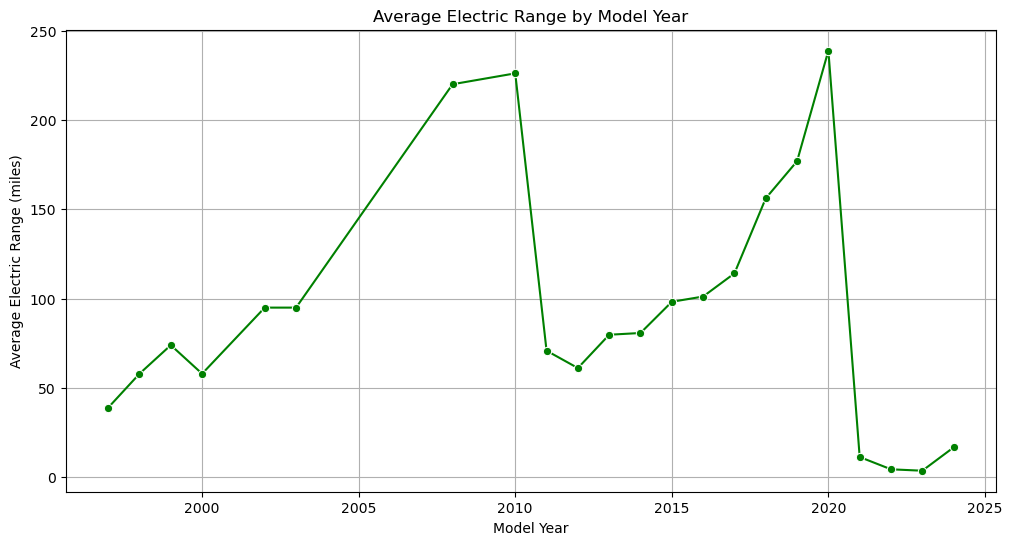

In [17]:
avg_rang_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=avg_rang_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

 Next, let’s explore how electric ranges vary among the top manufacturers and models. 

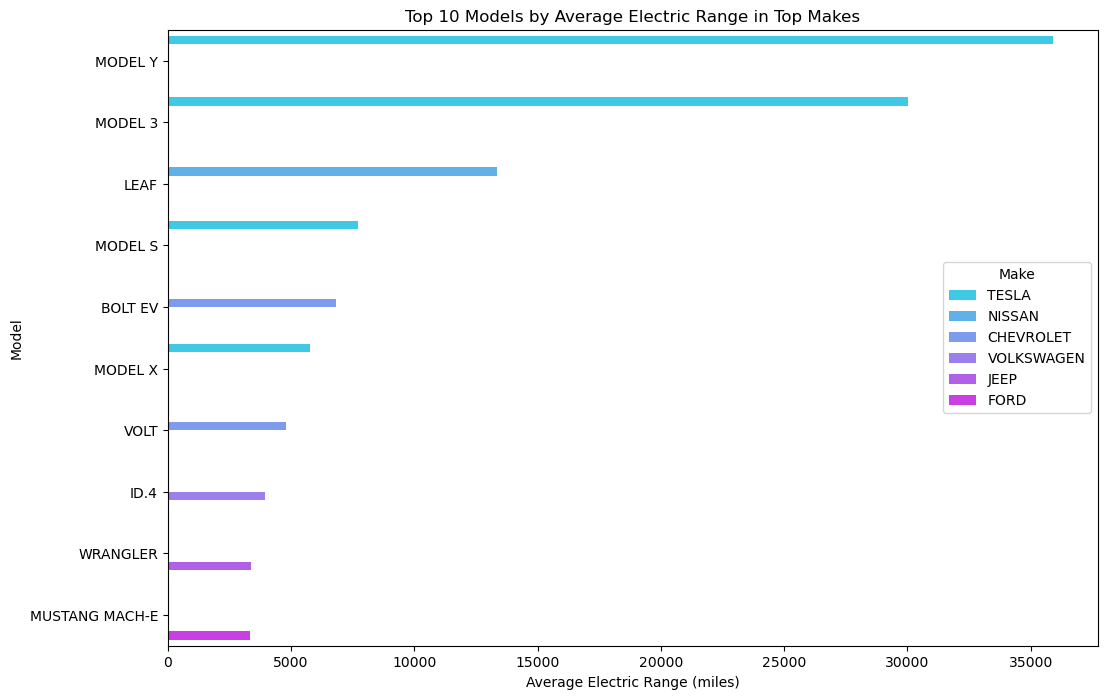

In [19]:
avg_rang_by_model = data.groupby(['Model', 'Make'])['Electric Range'].size().sort_values(ascending= False).reset_index()


top_range_model = avg_rang_by_model.head(10)


plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_model, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [21]:
# calculate the number of EVs registered each year
ev_registration_counts = data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: Model Year, dtype: int64

#### 6. Estimated Growth in Market Size:

In [28]:
from scipy.optimize import curve_fit
import numpy as np 

#filter the data assume 2023 is last complete year
filter_years= ev_registration_counts[ev_registration_counts.index<=2023]

def exp_growth(x, a, b):
    return a* np.exp(b*x)

#prepare data for curve fitting
x_data = filter_years.index - filter_years.index.min()
y_data = filter_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024+6) - filter_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filter_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


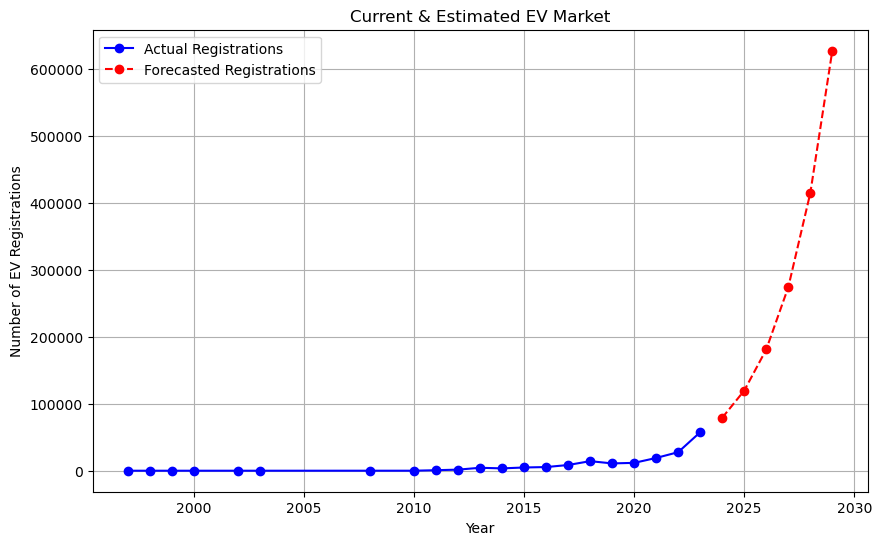

In [31]:
# prepare data for plotting
years = np.arange(filter_years.index.min(), 2029 + 1)
actual_years = filter_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filter_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(10, 6))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

From the above graph

1. The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.

2. The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.



## 1. Linear Regression


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Assuming 'ev_registration_counts' is a pandas Series with the index as the year

# Prepare the data
X = np.array(ev_registration_counts.index).reshape(-1, 1)  # Years
y = np.array(ev_registration_counts.values)  # Registration counts

# Split the data (optional if you're forecasting not evaluating)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future values
forecast_years = np.arange(2024, 2030).reshape(-1, 1)  # Forecasting for 2024 to 2029
forecasted_values = model.predict(forecast_years)

# Display forecasted values
forecasted_evs = dict(zip(forecast_years.flatten(), forecasted_values))
print(forecasted_evs)


{2024: 21631.12787944032, 2025: 22764.3976318622, 2026: 23897.667384284083, 2027: 25030.93713670643, 2028: 26164.206889128312, 2029: 27297.476641550194}


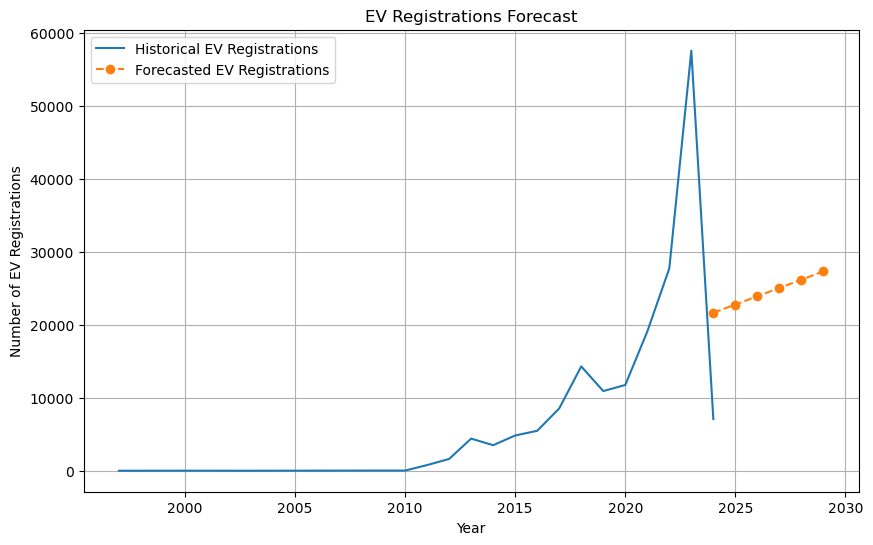

In [34]:
import matplotlib.pyplot as plt

# Assuming 'ev_registration_counts' is your historical data
# And 'forecasted_evs' contains your forecasted values as a dictionary from the previous steps

# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(ev_registration_counts.index, ev_registration_counts.values, label='Historical EV Registrations')

# Plot forecasted data
plt.plot(list(forecasted_evs.keys()), list(forecasted_evs.values()), label='Forecasted EV Registrations', linestyle='--', marker='o')

plt.title('EV Registrations Forecast')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()


## 2. LSTM (Long Short-Term Memory)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'ev_registration_counts' is a pandas Series

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(ev_registration_counts.values).reshape(-1, 1))

# Prepare the dataset for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 3
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM [samples, time steps, features]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Forecasting
def forecast(model, data, time_step, future_periods):
    forecasted = []
    input_seq = data[-time_step:].reshape(1, time_step, 1)
    for _ in range(future_periods):
        pred = model.predict(input_seq)
        forecasted.append(pred[0,0])
        input_seq = np.append(input_seq[:,1:,:],[[pred[0]]], axis=1)
    return scaler.inverse_transform(np.array(forecasted).reshape(-1, 1))

forecasted_values = forecast(model, scaled_data, time_step, 6)  # Next 6 years

# Display forecasted values
forecast_years = np.arange(2024, 2030)
forecasted_evs = dict(zip(forecast_years, forecasted_values.flatten()))
print(forecasted_evs)


Epoch 1/100
18/18 - 8s - loss: 0.0662 - 8s/epoch - 423ms/step
Epoch 2/100
18/18 - 0s - loss: 0.0517 - 146ms/epoch - 8ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0462 - 146ms/epoch - 8ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0415 - 145ms/epoch - 8ms/step
Epoch 5/100
18/18 - 0s - loss: 0.0391 - 147ms/epoch - 8ms/step
Epoch 6/100
18/18 - 0s - loss: 0.0350 - 145ms/epoch - 8ms/step
Epoch 7/100
18/18 - 0s - loss: 0.0264 - 146ms/epoch - 8ms/step
Epoch 8/100
18/18 - 0s - loss: 0.0174 - 148ms/epoch - 8ms/step
Epoch 9/100
18/18 - 0s - loss: 0.0155 - 139ms/epoch - 8ms/step
Epoch 10/100
18/18 - 0s - loss: 0.0152 - 139ms/epoch - 8ms/step
Epoch 11/100
18/18 - 0s - loss: 0.0134 - 137ms/epoch - 8ms/step
Epoch 12/100
18/18 - 0s - loss: 0.0133 - 145ms/epoch - 8ms/step
Epoch 13/100
18/18 - 0s - loss: 0.0148 - 154ms/epoch - 9ms/step
Epoch 14/100
18/18 - 0s - loss: 0.0124 - 153ms/epoch - 9ms/step
Epoch 15/100
18/18 - 0s - loss: 0.0158 - 154ms/epoch - 9ms/step
Epoch 16/100
18/18 - 0s - loss: 0.0201 - 146ms/epo

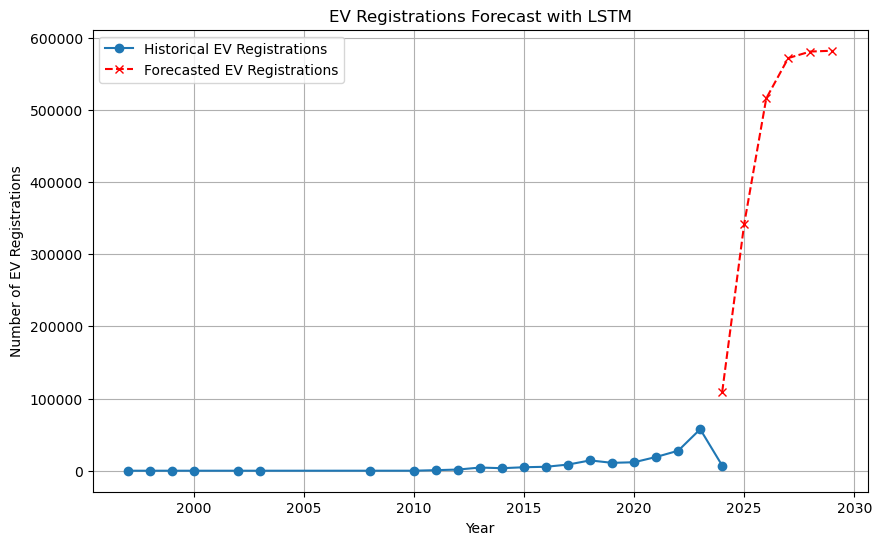

In [36]:
import matplotlib.pyplot as plt

# Assuming:
# ev_registration_counts is your historical data (Pandas Series or DataFrame).
# forecasted_evs is a dictionary containing your forecasted values from the LSTM model.

# Historical Data Plot
plt.figure(figsize=(10, 6))
plt.plot(ev_registration_counts.index, ev_registration_counts.values, label='Historical EV Registrations', marker='o')

# Forecasted Data Plot
# Note: Ensure the keys of forecasted_evs are the correct future years and the values are properly scaled back.
forecast_years = list(forecasted_evs.keys())
forecast_values = list(forecasted_evs.values())
plt.plot(forecast_years, forecast_values, 'r--', label='Forecasted EV Registrations', marker='x')

plt.title('EV Registrations Forecast with LSTM')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()


## Summary

So, market size analysis is a crucial aspect of market research that determines the potential sales volume within a given market. It helps businesses understand the magnitude of demand, assess market saturation levels, and identify growth opportunities. From my market size analysis of electric vehicles, we found a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.